In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [92]:
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
data.shape

(891, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

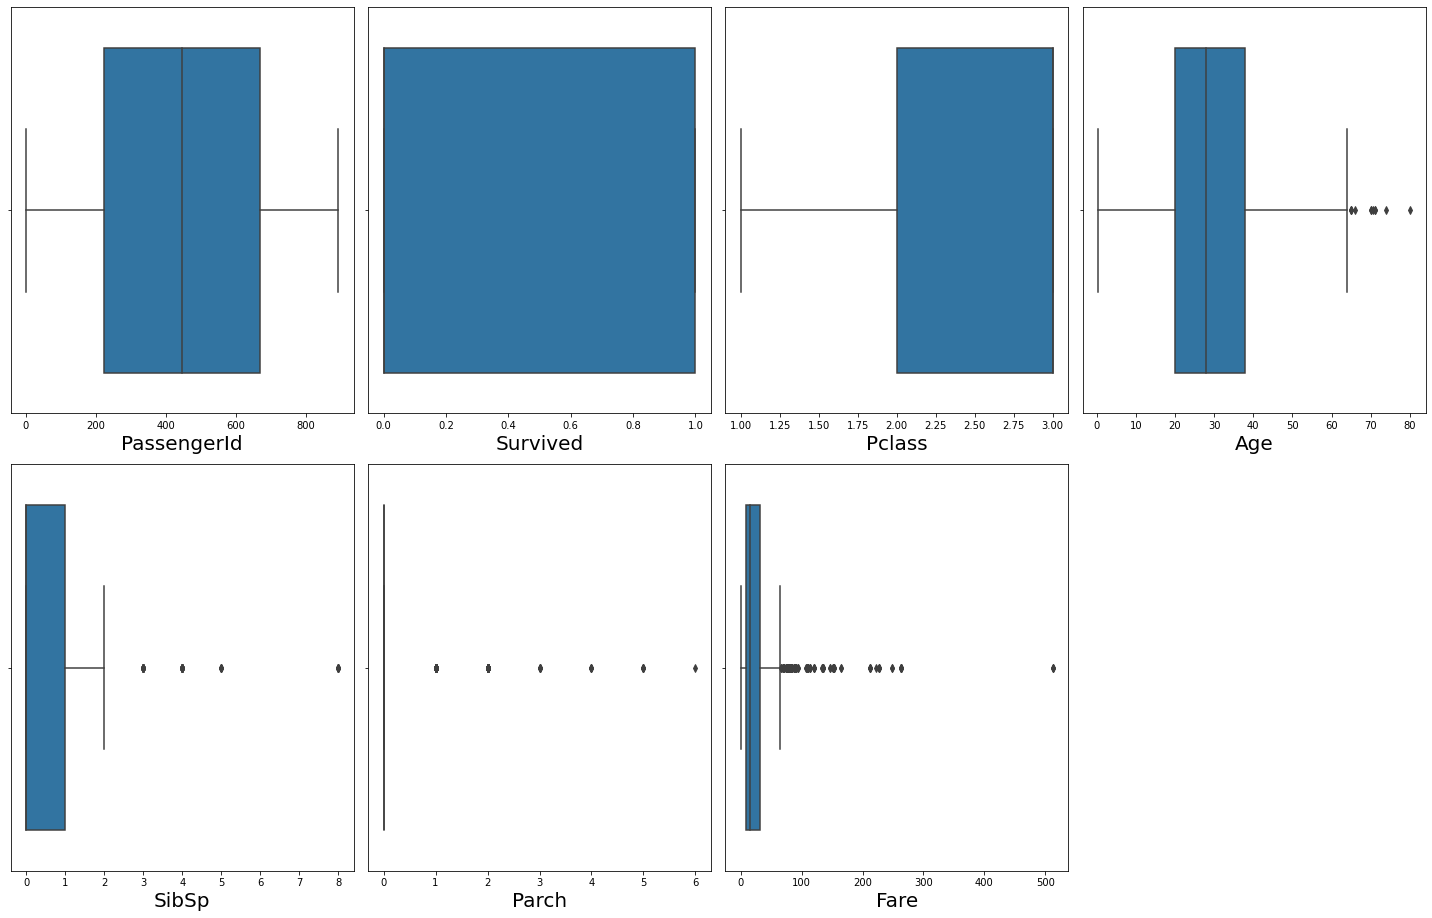

In [94]:
## checking outliers
columns = [column for column in data.columns if data[column].dtype in ['int64', 'float64']]
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in columns:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

### fare column is having a lot of outliers

<AxesSubplot:>

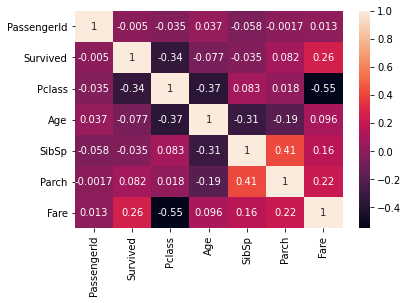

In [95]:
corr = data.corr()
sns.heatmap(corr, annot=True)

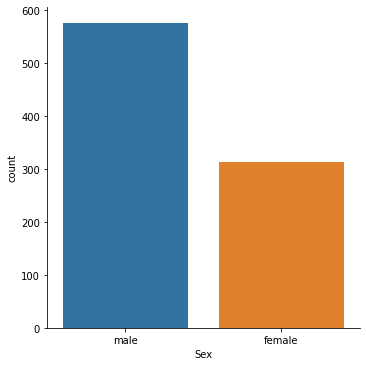

In [53]:
sns.catplot(x ="Sex", data=data, kind="count")

### males are about 45-50% more than females

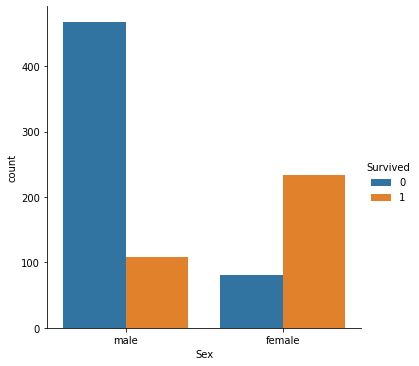

In [12]:
## ploting survived column against gender columns
sns.catplot(x="Sex", hue="Survived", data=data, kind="count")

### male passengers died more than female passenger

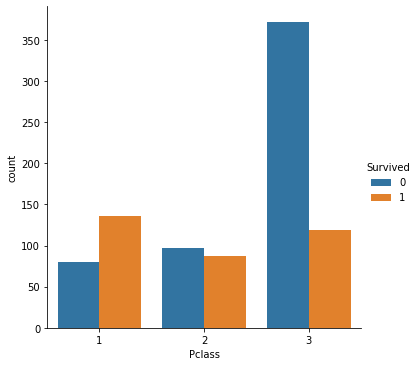

In [14]:
## ploting survived column against Passenger class columns
sns.catplot(x="Pclass", hue="Survived", data=data, kind="count")

### 1st class passengers survived more than 2nd and third class passengers

<AxesSubplot:xlabel='Sex', ylabel='Age'>

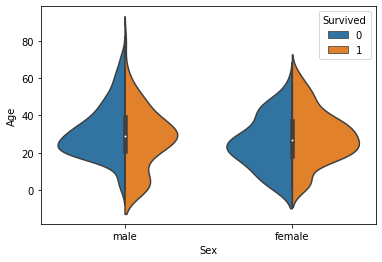

In [26]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", 
data = data, split = True)

### teenagers survived more women aged around 20-30 survived aged men died more

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

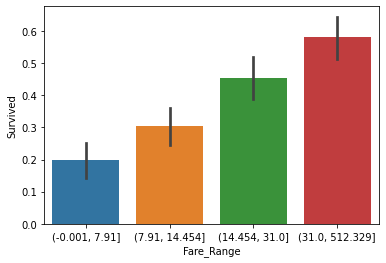

In [34]:
# dividing fare in 4 parts
data['Fare_Range'] = pd.qcut(data['Fare'], 4)

sns.barplot(x ='Fare_Range', y ='Survived', 
data = data)

### as fare increases the chances of survival also increases

<AxesSubplot:xlabel='Embarked', ylabel='count'>

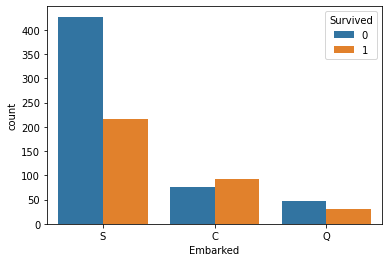

In [41]:
sns.countplot(x = 'Embarked', hue="Survived", data=data)
# C = Cherbourg; Q = Queenstown; S = Southampton

### people boarded from Cherbourg survived more and poeple that boarded from Southampton died the most as there count is also high 

<AxesSubplot:xlabel='SibSp', ylabel='count'>

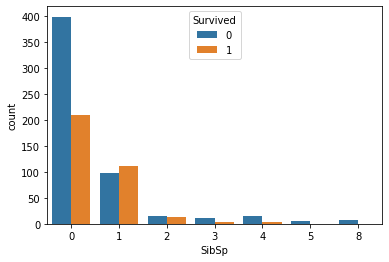

In [46]:
sns.countplot(x = 'SibSp', hue="Survived", data=data)

In [47]:
### poeple with 1 sibling onboard surbvived the most

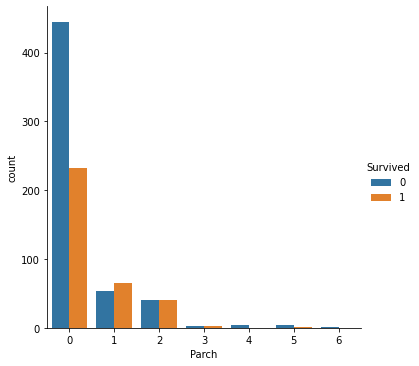

In [49]:
sns.catplot(x="Parch", hue="Survived", data=data, kind="count")

### pople with 1, 2 and 3 Number of Parents/Children Aboard survived the most

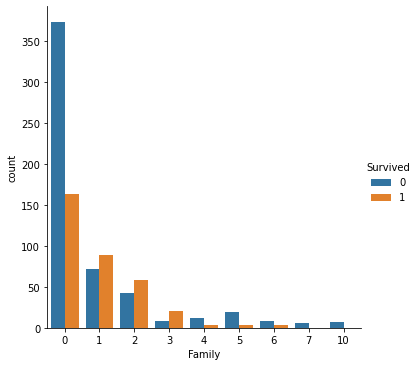

In [98]:
data['Family'] = data['SibSp'] + data['Parch']

sns.catplot(x="Family", hue="Survived", data=data, kind="count")

### person with family count fo 1, 2 and 3 survived the most

# Libraries like SweetViz can be used for automatic visualization

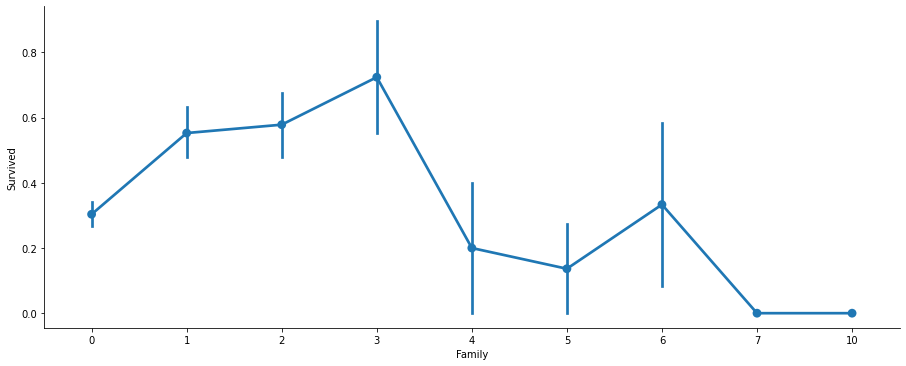

In [101]:
sns.factorplot('Family','Survived', 
                      data=data, aspect = 2.5, )

### high priority for survival of family members 1, 2, and 3